In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/usdot/flight-delays

In [37]:
df = pd.read_csv('flights.csv', dtype=str)
#print(df.head(100))
print(df.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [29]:
print(df['CANCELLATION_REASON'])
print(df['WEATHER_DELAY'])

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
5819074    NaN
5819075    NaN
5819076    NaN
5819077    NaN
5819078    NaN
Name: CANCELLATION_REASON, Length: 5819079, dtype: object
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
5819074    NaN
5819075    NaN
5819076    NaN
5819077    NaN
5819078    NaN
Name: WEATHER_DELAY, Length: 5819079, dtype: object


In [21]:
#Предварительная работа
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]
#df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
#df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
df.ARRIVAL_DELAY = df.ARRIVAL_DELAY.astype(float)
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df.DAY_OF_WEEK = df.DAY_OF_WEEK.astype(int)

<ipython-input-21-66ba22862e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
<ipython-input-21-66ba22862e89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ARRIVAL_DELAY = df.ARRIVAL_DELAY.astype(float)
<ipython-input-21-66ba22862e89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

**1.Исследование средней задержки прибытия по месяцам.**




['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']


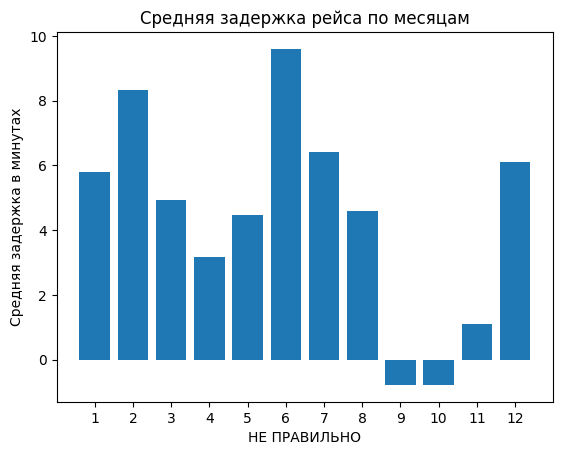

In [22]:
M = df.MONTH.unique()
print(M)
mondelay = df.groupby('MONTH')['ARRIVAL_DELAY'].mean()
plt.bar(M, mondelay[M])

plt.xlabel('НЕ ПРАВИЛЬНО')
plt.ylabel('Средняя задержка в минутах')
plt.title('Средняя задержка рейса по месяцам')
plt.show()

Но, **отрицательная задержка** это что-то странное. Поэтому давайте чуть изменим начальный датафрейм.

In [24]:
df['adl'] = df['ARRIVAL_DELAY'] > 0
adf = df[df['adl']]                            # adf - delayed df

<ipython-input-24-afeb7fddab05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adl'] = df['ARRIVAL_DELAY'] > 0


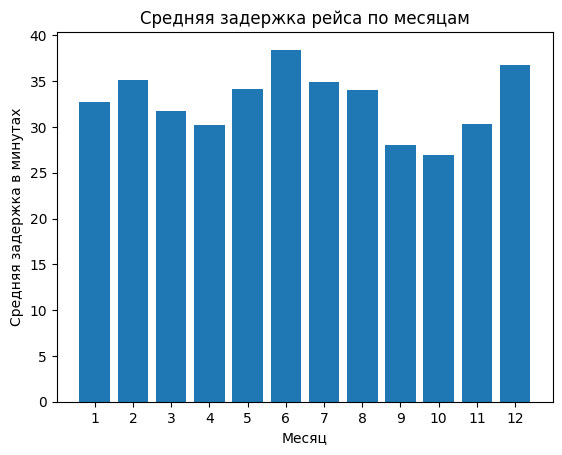

In [25]:
cmndel = adf.groupby('MONTH')['ARRIVAL_DELAY'].mean()
plt.bar(M, cmndel[M])

plt.xlabel('Месяц')
plt.ylabel('Средняя задержка в минутах')
plt.title('Средняя задержка рейса по месяцам')
plt.show()

Картина после отбрасыния *некорректных данных* изменилась. Наибольший наплыв туристов - середина лета и конец года (вероятно, это связано с новогодними праздниками)

**2.Исследование средней задержки прибытия по компаниям.**

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']


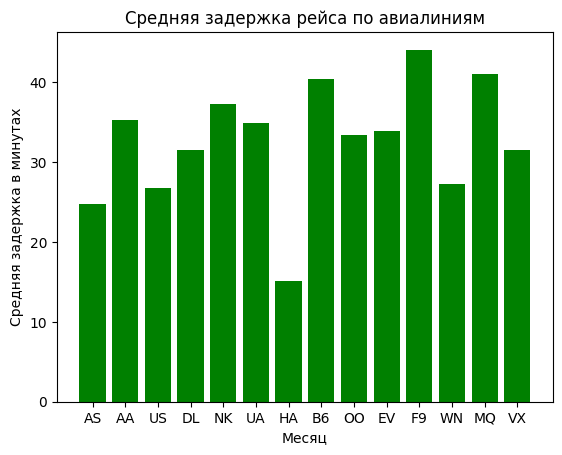

In [12]:
A = df.AIRLINE.unique()
print(A)
commondelay = adf.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
plt.bar(A, commondelay[A], color = 'green')

plt.xlabel('Месяц')
plt.ylabel('Средняя задержка в минутах')
plt.title('Средняя задержка рейса по авиалиниям')
plt.show()

Таким образом, после отбрасывания некорректных данных получаем, что компания которая задерживает рейсы меньше всего - **НА**, а чаще всего это делает компания **F9**.(Корректнее будет сказать, что в среднем у **F9** наибольшая задержка относительно прибытия, а у **НА** - наименьшая)

**3. Исследование средней задержки отправления по дням недель и их количество**

Аналогично строим adf # dddf - отправившиеся с опозданием

[4 5 6 7 1 2 3]


Text(0.5, 1.0, 'Средняя задержка рейса по дням недели')

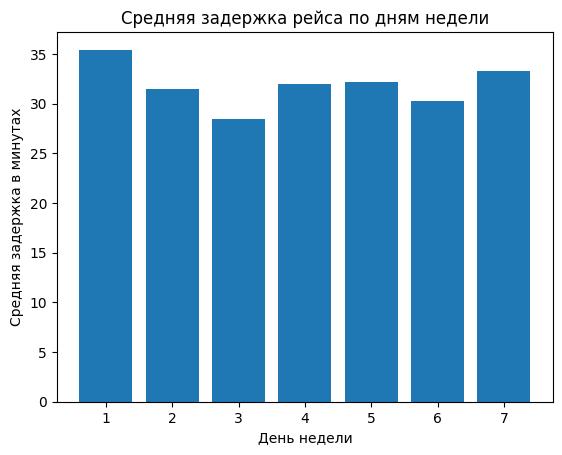

In [13]:
df['ddl'] = df['DEPARTURE_DELAY'] > 0
ddf = df[df['ddl']]

                        # ddf - delayed df
DW = (df.DAY_OF_WEEK.unique())
print(DW)
#DW = [1,2,3,4,5,6,7]
wmondelay = ddf.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
plt.bar(DW, wmondelay[DW])
plt.xlabel('День недели')
plt.ylabel('Средняя задержка в минутах')
plt.title('Средняя задержка рейса по дням недели')

Text(0.5, 1.0, 'Количество задержек рейса по дням недели')

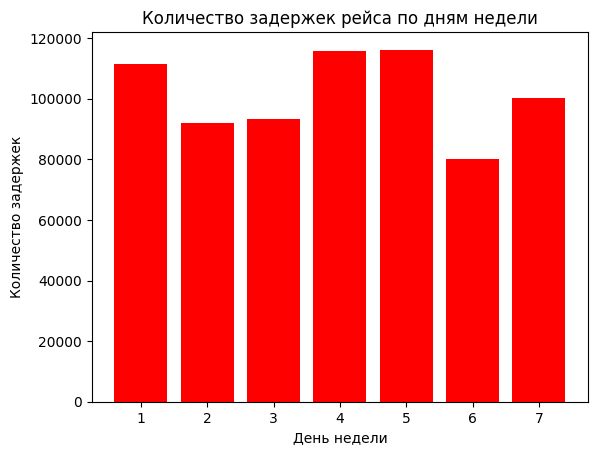

In [15]:
wkmondelay = ddf.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].count()
#wkmondelay = ddf.groupby('DAY_OF_WEEK')['ddl'].sum() #делает тоже самое
plt.bar(DW, wkmondelay[DW], color = 'red')
plt.xlabel('День недели')
plt.ylabel('Количество задержек')
plt.title('Количество задержек рейса по дням недели')

Таким образом, проблемы в понедельник скорее всего возникают из-за того, что аэропорты не справляются с потоком пассажиров после выходных дней. В четверг и пятницу тоже трудности, из-за большого потока улетающих людей на выходные

In [43]:
CR = df.WEATHER_DELAY.unique()
#print(CR)
C = df.WEATHER_DELAY.unique()
#print(C)

**4.Средняя задержка по аэропортам**

Text(0.5, 1.0, 'Топ 10 аэропортов по наибольшей задержке вылета')

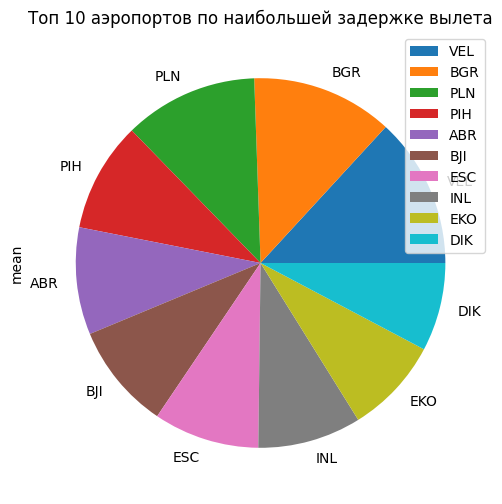

In [104]:
depdelbyairport = ddf.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].agg(['mean']).sort_values(by='mean', ascending=False)
#print(depdelbyairport)
top = depdelbyairport.head(10)
#print(top)
#print(OA)
top.plot(kind='pie', figsize=(10, 6), subplots=True)


plt.title('Топ 10 аэропортов по наибольшей задержке вылета')

Text(0.5, 1.0, 'Топ 10 аэропортов по наименьшей задержке вылета')

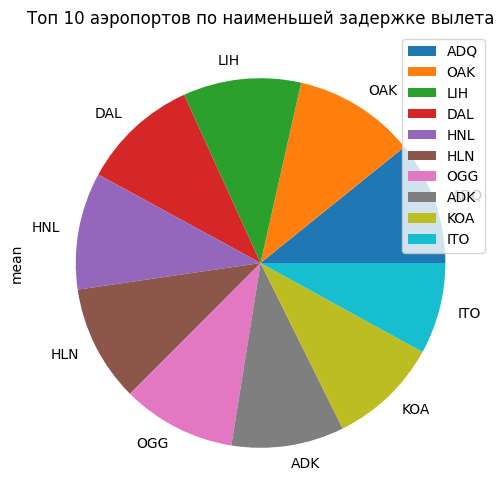

In [105]:
down = depdelbyairport.tail(10)
down.plot(kind='pie', figsize=(10, 6), subplots=True)


plt.title('Топ 10 аэропортов по наименьшей задержке вылета')

Таким образом, в среднем наименьшие задержки вылета в аэропортах **ITO**, **KOA**, **ADK**, а наибольшее в аэропортах **VER**, **BGL**, **PNL**

**5.Отмены рейса**

[nan 'A' 'B' 'C' 'D']
[2.5262e+04 4.8851e+04 1.5749e+04 2.2000e+01]


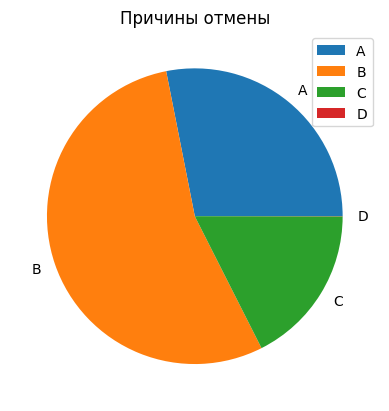

In [103]:
reas = df.CANCELLATION_REASON.unique()
print(reas)
cancfl = df.loc[~df[['CANCELLATION_REASON']].isna().any(axis=1)] #отмененные полеты
a = np.zeros(4)
a[0] = df[df['CANCELLATION_REASON'] == 'A'].shape[0]
a[1] = df[df['CANCELLATION_REASON'] == 'B'].shape[0]
a[2] = df[df['CANCELLATION_REASON'] == 'C'].shape[0]
a[3] = df[df['CANCELLATION_REASON'] == 'D'].shape[0]
print(a)
plt.pie(a, labels = ['A','B','C','D'])
plt.title('Причины отмены')
plt.legend()

Таким образом образом, причина отмены B - самая распостроненная (возможно это плохие подобные условия или неисправность самолета) , а причина D происходит реже всего.